# How to create dot plots in Python
## A little tweak to classic Seaborn scatterplot 

Recently I looked at my IMDb account. Whoa, there is over 1100 rated titles! I decided to create a plot of movies I’ve seen every year and their ratings. Dot plot is a great way to visualize it, I always liked the plots like these [created with ggplot2](https://ggplot2.tidyverse.org/reference/geom_dotplot.html): 
<img src="https://ggplot2.tidyverse.org/reference/geom_dotplot-16.png">

All right, it shouldn’t be a hard task in Python. I just need to get a .csv file with my ratings, write few lines of code using Matplotlib/Seaborn and voila! Quickly I realized that Matplotlib doesn’t support dot plots. Neither do Seaborn. I quickly checked MS Excel – also no dot plots! 

After few minutes of googling I found [one solution](https://stackoverflow.com/questions/49703938/how-to-create-a-dot-plot-in-matplotlib-not-a-scatter-plot). However, creating a histogram of values and then mapping them on a scatterplot doesn’t solve the problem of different marker colors for ratings. 

I liked the idea of tweaking standard scatterplot, so I decided to go that way. Instead of creating a grid of points I used a simple loop to add new variable responsible for movie count per year. 

First, we create an empty array `movie_count`, which will store a vertical position on the chart for every movie. Then we loop over the year column using the `enumerate` function. For every movie we create a subset starting from first index until this exact movie. Now we count all movies in this subset and append the result to `movie_count`.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Get data
ratings = pd.read_csv('ratings.csv', encoding='iso8859')
print(ratings.head())

# Loop to create a new variable, which will turn scatterplot to a dot plot
movie_count = []

for index, year in enumerate(ratings['Year']):
    subset = ratings.iloc[:index+1]     # Create subset starting at the beginning of dataset until the movie
    count = len(subset[subset['Year'] == year])   # Count all movies from the same year in this subset
    movie_count.append(count)   # Appended counts will be used as vertical values in the scatterplot,
                                # which will help to create a dot plot

       Const  Your Rating  Date Rated                   Title  \
0  tt0100050            5  2018-10-31  Look Who's Talking Too   
1  tt1000774            5  2018-09-24        Sex and the City   
2  tt1001526            8  2018-09-25                Megamind   
3  tt0100157            7  2018-09-25                  Misery   
4  tt0100263            7  2018-11-01                  Nikita   

                                     URL Title Type  IMDb Rating  \
0  https://www.imdb.com/title/tt0100050/      movie          4.6   
1  https://www.imdb.com/title/tt1000774/      movie          5.6   
2  https://www.imdb.com/title/tt1001526/      movie          7.3   
3  https://www.imdb.com/title/tt0100157/      movie          7.8   
4  https://www.imdb.com/title/tt0100263/      movie          7.3   

   Runtime (mins)  Year                                     Genres  Num Votes  \
0            81.0  1990                    Comedy, Family, Romance    41915.0   
1           145.0  2008               

For example, if we are looking at 20th movie in the dataset and it was released in 2018, we create a subset of the 20 movies and count all movies from 2018. Let’s say there are three of them, so we append that number to movie_count array on 20th position. If the next movie is also from 2018, it gets a count of 4 and so on. Every single movie in our dataset gets a unique pair of coordinates – release year and count. This way we can create a scatterplot which will in fact be the dot plot. Now we just add hue as a parameter to get different colors for ratings and it should be working. 

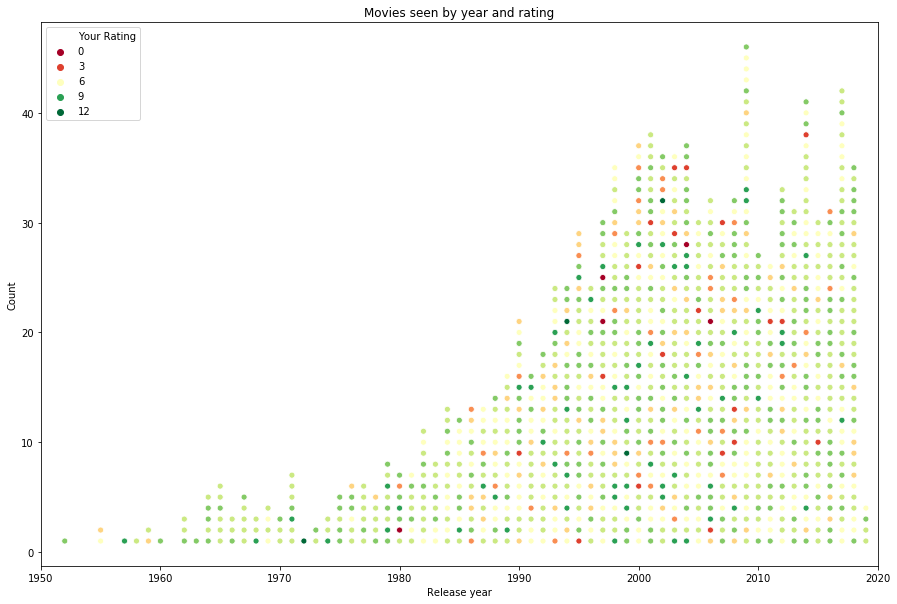

In [2]:
# Data for the plot
x = ratings['Year']
y = movie_count
hue = ratings['Your Rating']

# Dot plot created using scatter plot
plt.figure(figsize=(15, 10))
ax = sns.scatterplot(x, y, hue=hue, palette="RdYlGn")
plt.xlim([1950, 2020])
plt.ylabel("Count")
plt.xlabel("Release year")
plt.title("Movies seen by year and rating")
plt.show()

The basic idea works, but now we need to fix some issues:
1. The movies should be sorted by rating for better readability.
2. The dots need to be bigger.
3. Background color should be added for better contrast.
4. The legend is just bad. You cannot rate movie 0 or 12 on 1-10 scale. Also, for this kind of data smooth (or discrete, your choice) colormap would be better. There is a great post about creating colormaps [over here](http://pyhogs.github.io/colormap-examples.html).

After fixing these problems you can get a nice chart:


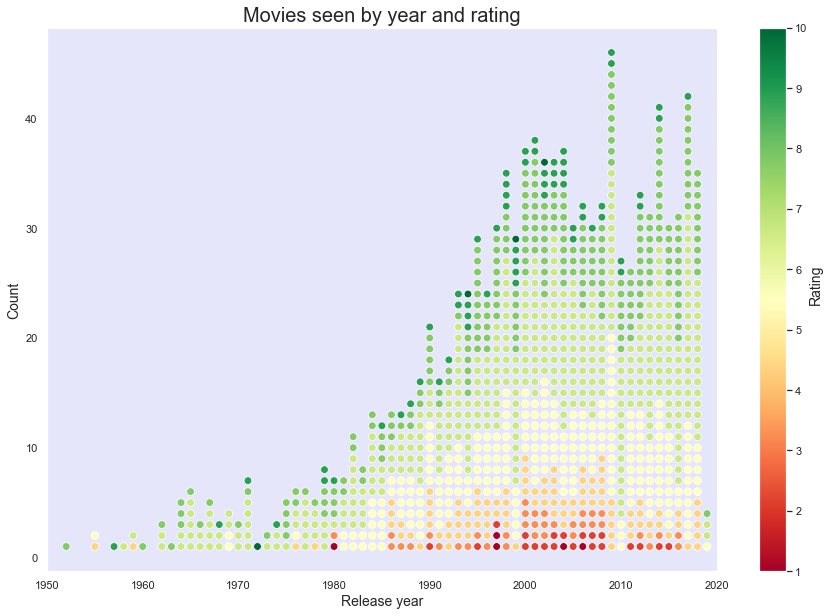

In [3]:
# Let's start from the beginning with improved code
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'axes.facecolor': 'lavender'})  # Background color for the plot
%matplotlib inline

# Get data
ratings = pd.read_csv('ratings.csv', encoding='iso8859')

# Sort values by rating
ratings = ratings.sort_values(by=['Your Rating'])

# Loop to create a new variable, which will turn scatterplot to a dot plot
movie_count = []

for index, year in enumerate(ratings['Year']):
    subset = ratings.iloc[:index + 1]  # Create subset starting at the beginning of dataset until the movie itself
    count = len(subset[subset['Year'] == year])  # Count all movies from the same year in this subset
    movie_count.append(count)  # Appended counts will be used as vertical values in the scatterplot,
    # which will help to create a dot plot

# Data for the plot
x = ratings['Year']
y = movie_count
hue = ratings['Your Rating']

# Dot plot created using scatter plot
plt.figure(figsize=(15, 10))
ax = sns.scatterplot(x, y, hue=hue, s=60, legend="full", palette="RdYlGn")
ax.grid(False)  # Remove grid
ax.get_legend().remove()  # Delete default legend
scale_legend = plt.Normalize(hue.min() - 1, hue.max())  # Create a scale for the colormap.
# hue.min-1 because I never rated a movie 1/10, but still wanted to create a consistent color map.
color_map = plt.cm.ScalarMappable(cmap="RdYlGn", norm=scale_legend)  # Colormap used in legend.
color_map.set_array([])  # Dummy variable needed to create a colormap.
ax.figure.colorbar(color_map)  # Add colormap as a legend.
plt.xlim([1950, 2020])  # There are just few movies I seen from before 1950.
plt.ylabel("Count", size=14)
plt.xlabel("Release year", size=14)
plt.title("Movies seen by year and rating", size=20)
plt.gcf().text(0.83, 0.5, "Rating", fontsize=14, rotation=90)  # Label used for colormap.
plt.show()

Feel free to comment or report any improvements in the code, as I just use Python for data science tasks and I’m not an expert in optimization. 